<a href="https://colab.research.google.com/github/bwaves26/statclass/blob/main/finalprojectv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
library(dplyr)
library(ggplot2)

In [6]:
police_killings <- read.csv("police_killings.csv")

In [7]:
head(police_killings)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519


Warning message:
“There were 10 warnings in `filter()`.
The first warning was:
ℹ In argument: `&...`.
Caused by warning in `grepl()`:
! unable to translate 'Rub<cc>_<e5><a9>n Garc<cc>__a Villalpando' to a wide string
ℹ Run `dplyr::last_dplyr_warnings()` to see the 9 remaining warnings.”


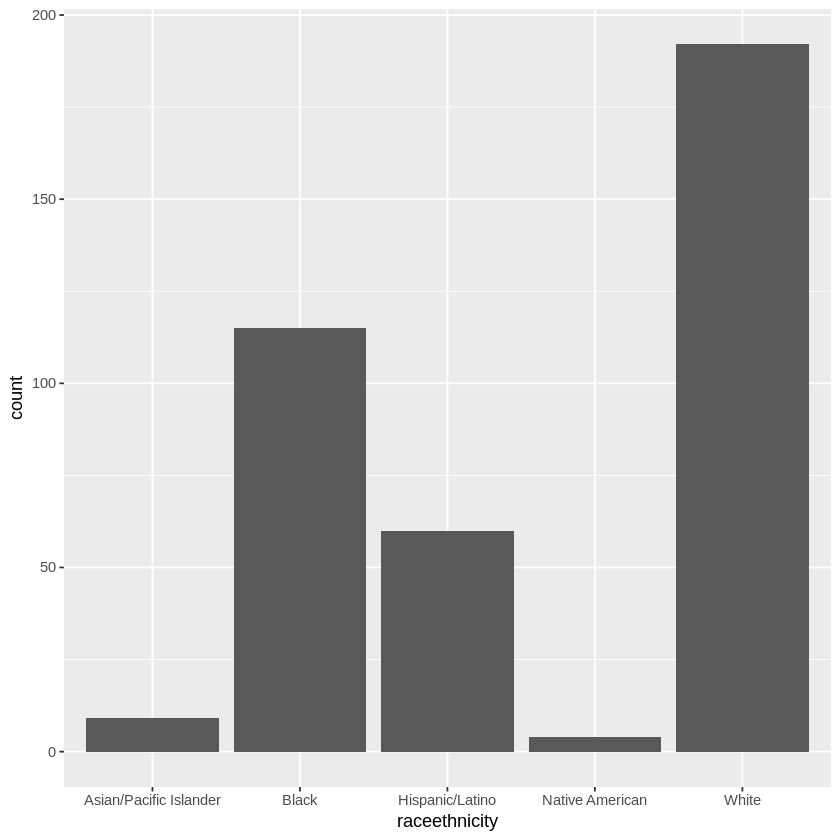

In [8]:
police_killings_clean <- police_killings %>%
  filter(if_all(everything(), ~ !grepl("unknown|^0$", ., ignore.case = TRUE)))%>%
  filter(!is.na(county_bucket))

police_killings_clean %>%
  ggplot()+
  aes(x= raceethnicity)+
  geom_bar()



In [9]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    pop = as.numeric(pop),
    share_white = as.numeric(share_white),
    share_black = as.numeric(share_black),
    share_hispanic = as.numeric(share_hispanic)
  )

In [10]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    whitepop = pop * share_white / 100,
    blackpop = pop * share_black / 100,
    hispanicpop = pop * share_hispanic / 100
  )

In [11]:
black_total_pop <- sum(police_killings_clean$blackpop)
white_total_pop <- sum(police_killings_clean$whitepop)
hispanic_total_pop <- sum(police_killings_clean$hispanicpop)

In [29]:
race_count <- table(police_killings_clean$raceethnicity)
w_rate100000<-race_count["White"]/white_total_pop*100000
b_rate100000<-race_count["Black"]/black_total_pop*100000
h_rate100000<-race_count["Hispanic/Latino"]/hispanic_total_pop*100000


prop.test( x = c(20.2,39.7,13.5), n = c(100000,100000,100000), alternative = 'greater')


	3-sample test for equality of proportions without continuity correction

data:  c(20.2, 39.7, 13.5) out of c(1e+05, 1e+05, 1e+05)
X-squared = 15.148, df = 2, p-value = 0.0005137
alternative hypothesis: two.sided
sample estimates:
  prop 1   prop 2   prop 3 
0.000202 0.000397 0.000135 


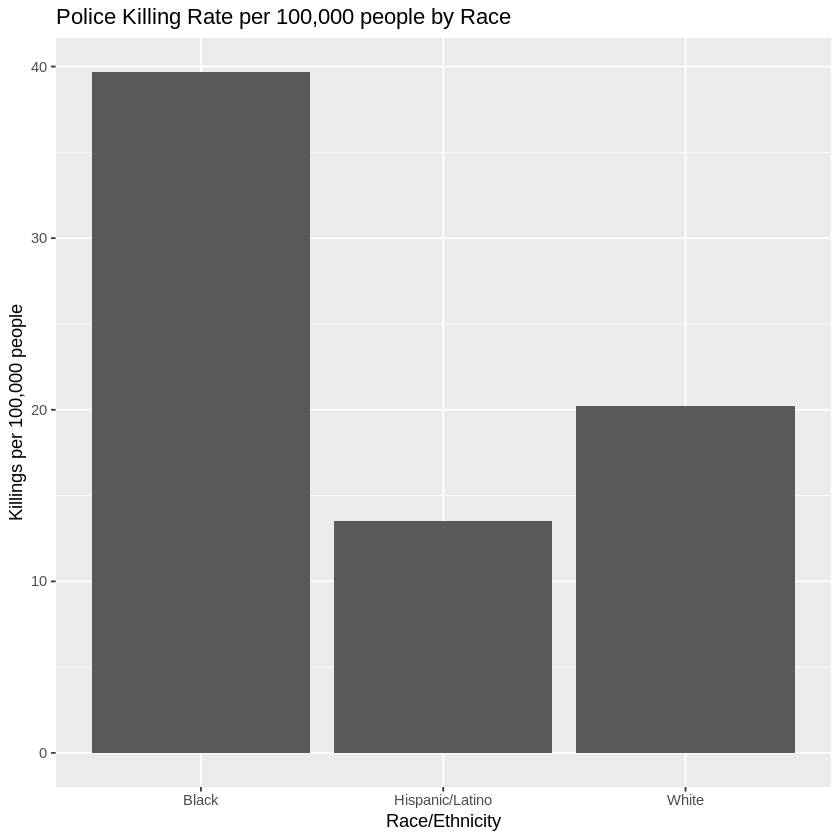

In [13]:
killings_by_race <- police_killings_clean %>%
  group_by(raceethnicity) %>%
  summarize(killings = n())


population_by_race <- data.frame(
  raceethnicity = c("White", "Black", "Hispanic/Latino"),
  population = c(white_total_pop, black_total_pop, hispanic_total_pop)
)


killings_and_population <- merge(killings_by_race, population_by_race, by = "raceethnicity")


killings_and_population <- killings_and_population %>%
  mutate(rate = (killings / population) * 100000)

ggplot(killings_and_population, aes(x = raceethnicity, y = rate)) +
  geom_col() +
  labs(title = "Police Killing Rate per 100,000 people by Race",
       x = "Race/Ethnicity",
       y = "Killings per 100,000 people")


In [14]:
killings_and_population

raceethnicity,killings,population,rate
<chr>,<int>,<dbl>,<dbl>
Black,115,289821.2,39.67964
Hispanic/Latino,60,443261.8,13.53602
White,192,950884.1,20.19174


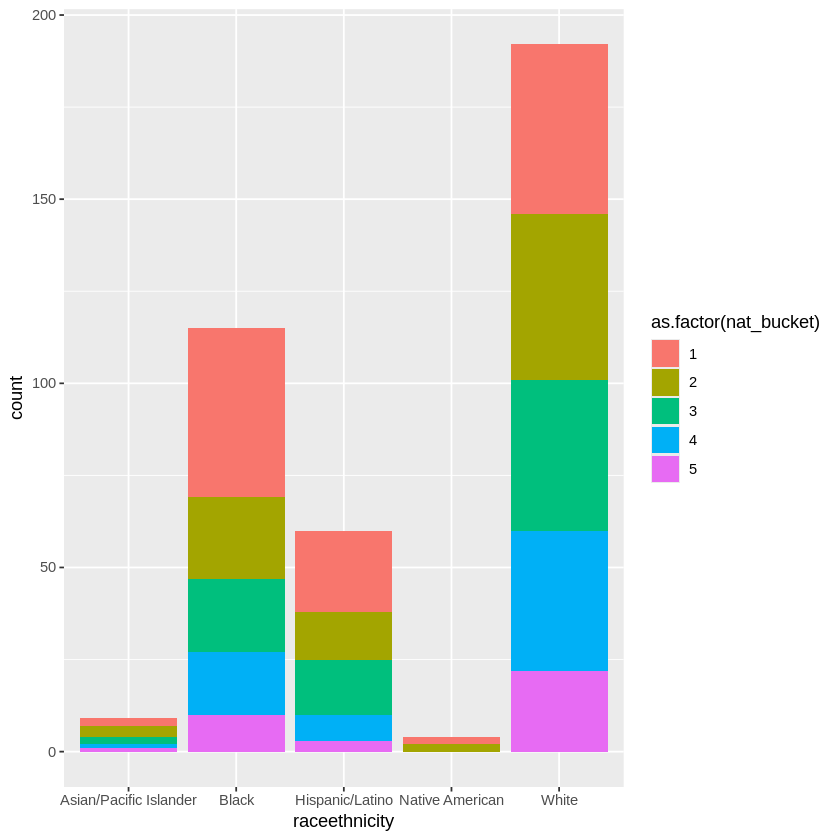

In [17]:
police_killings_clean %>%
  ggplot() +
  aes(x = raceethnicity, fill = as.factor(nat_bucket)) +
  geom_bar()

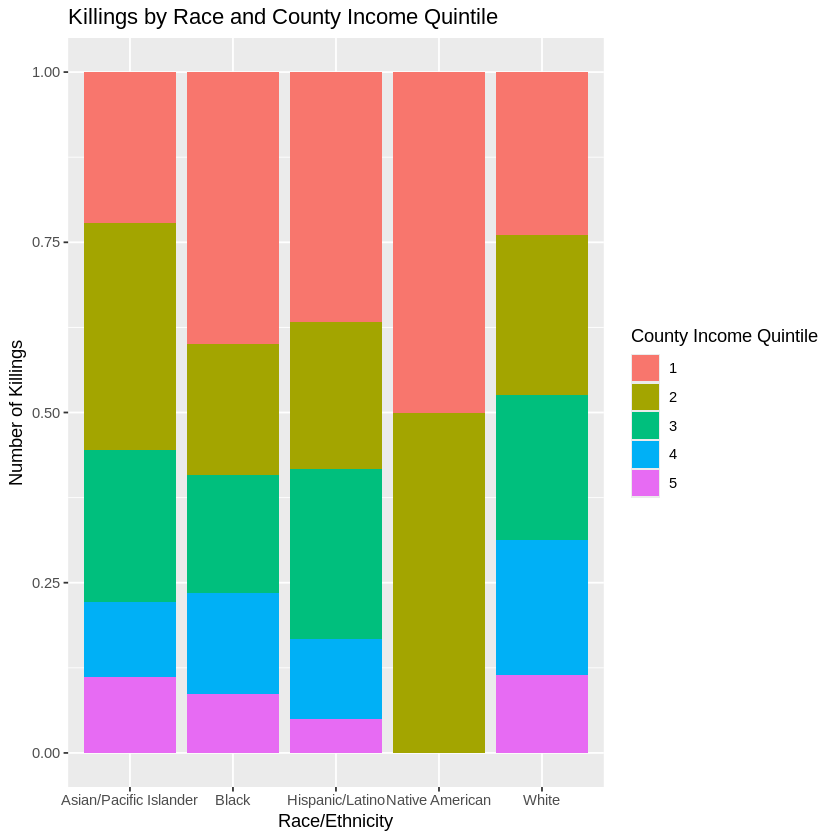

In [18]:
ggplot(police_killings_clean, aes(x = raceethnicity, fill = as.factor(nat_bucket))) +
  geom_bar(position = "fill") +
  labs(title = "Killings by Race and County Income Quintile",
       x = "Race/Ethnicity",
       y = "Number of Killings",
       fill = "County Income Quintile")

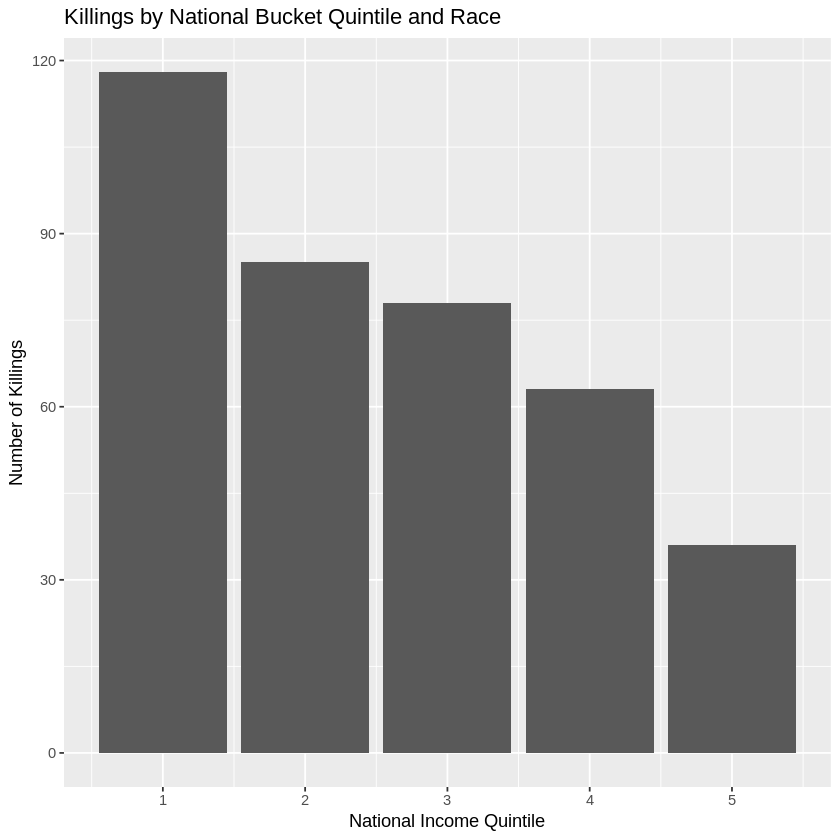

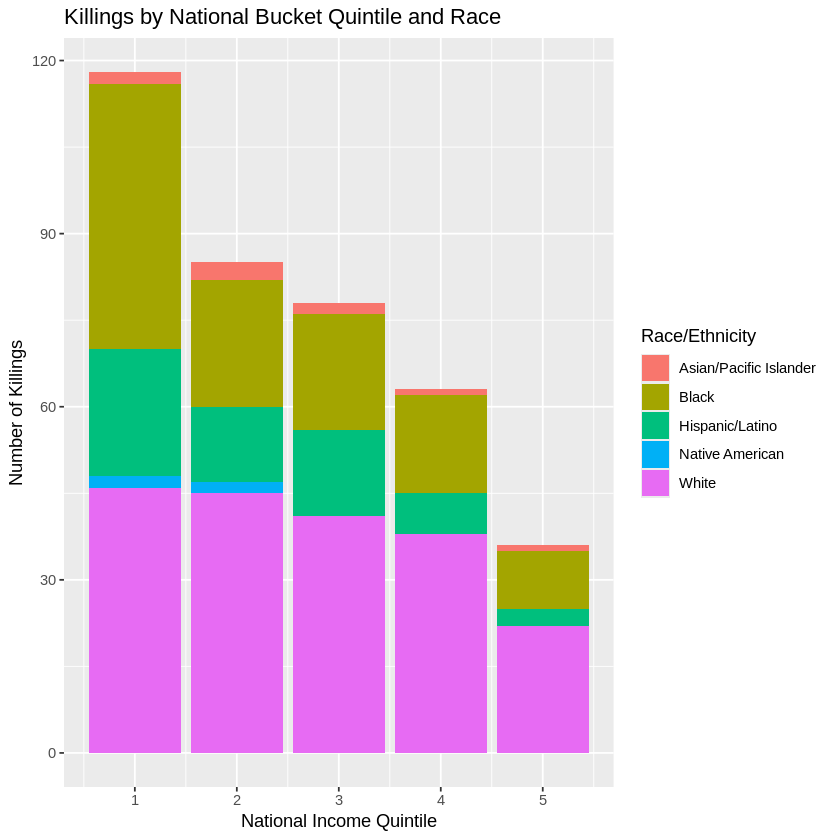

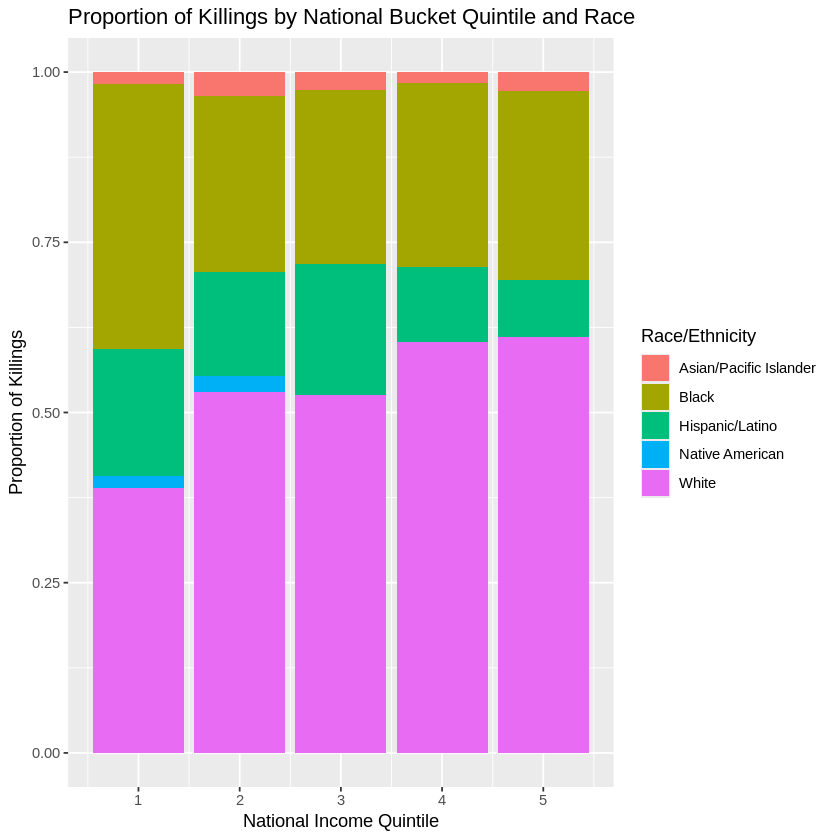

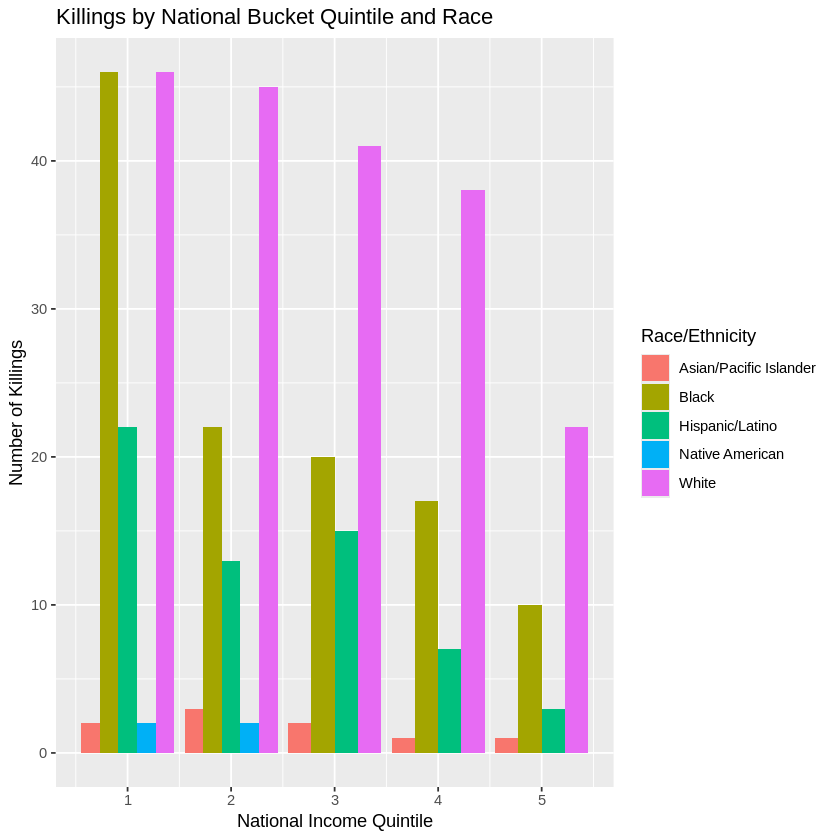

In [19]:
ggplot(police_killings_clean, aes(x = nat_bucket)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Number of Killings")

ggplot(police_killings_clean, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

ggplot(police_killings_clean, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

ggplot(police_killings_clean, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "dodge") +
  labs(title = "Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

In [20]:
summary(police_killings_clean)

     name               age               gender          raceethnicity     
 Length:380         Length:380         Length:380         Length:380        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:380         Min.   : 1.00   Min.   :2015   Length:380        
 Class :character   1st Qu.: 8.00   1st Qu.:2015   Class :character  
 Mode  :character   Median :15.00   Median :2015   Mode  :character  
                    Mean   :15.53   Mean   :2015                     
                    3rd Qu.:22.00   3rd Qu.:2015                     
                    Max.   :31.00   Max. 

In [ ]:
police_killings_clean %>%
  count(state)

state,n
<chr>,<int>
AK,2
AL,7
AR,3
AZ,20
CA,63
CO,10
CT,1
DC,1
DE,2


comparing summary stats, unemployment is up and college education is down in lower income areas

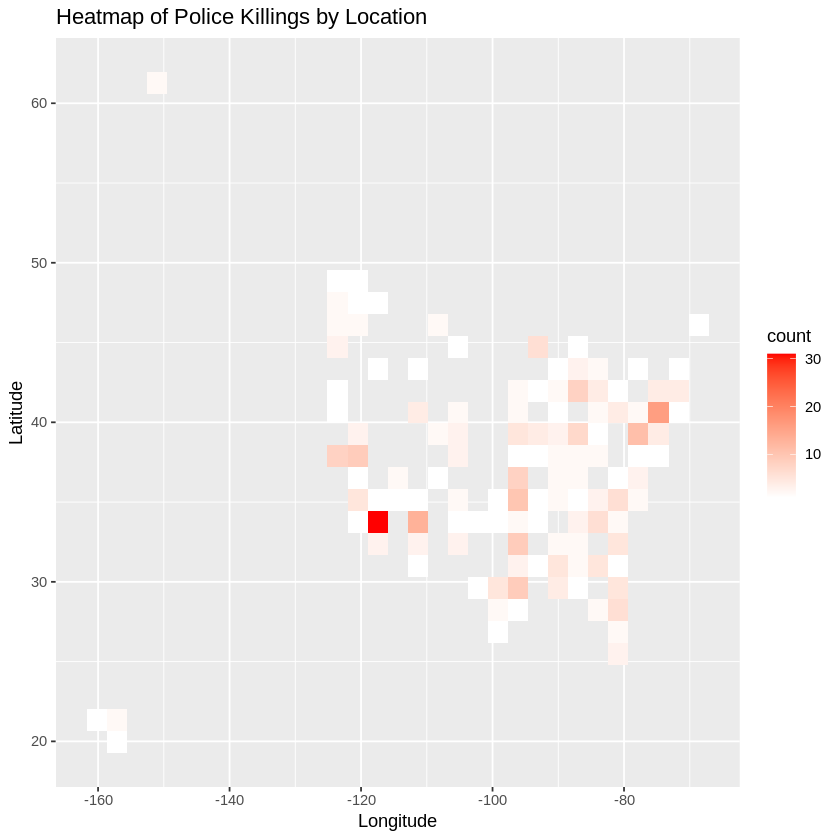

In [22]:
ggplot(police_killings_clean, aes(x = longitude, y = latitude)) +
  geom_bin2d() +
  labs(title = "Heatmap of Police Killings by Location",
       x = "Longitude",
       y = "Latitude") +
  scale_fill_gradient(low = "white", high = "red")

In [23]:
head(police_killings_clean)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,whitepop,blackpop,hispanicpop
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,54766,0.9379359,3,3,14.1,0.09768638,0.16850951,2286.295,1152.595,211.624
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,40930,0.6834107,2,1,28.8,0.06572379,0.11140236,1489.722,1002.378,13.845
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,54930,0.8258693,2,3,14.6,0.16629314,0.14731227,3010.302,314.083,685.272
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,55909,0.8638144,3,3,11.7,0.12482727,0.05013293,52.116,26.058,4290.884
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,49669,1.3848678,5,4,1.9,0.06354983,0.40395421,6298.325,95.326,115.753
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,53596,0.3887044,1,1,58,0.07365145,0.10295519,327.740,360.514,3698.780


In [24]:
subset_killings <- police_killings_clean %>%
  filter(state %in% c("CA", "TX", "FL"))

by age?
distribution of killings per race by age

In [25]:
police_killings_clean <- police_killings_clean %>%
  mutate(age = as.numeric(age))

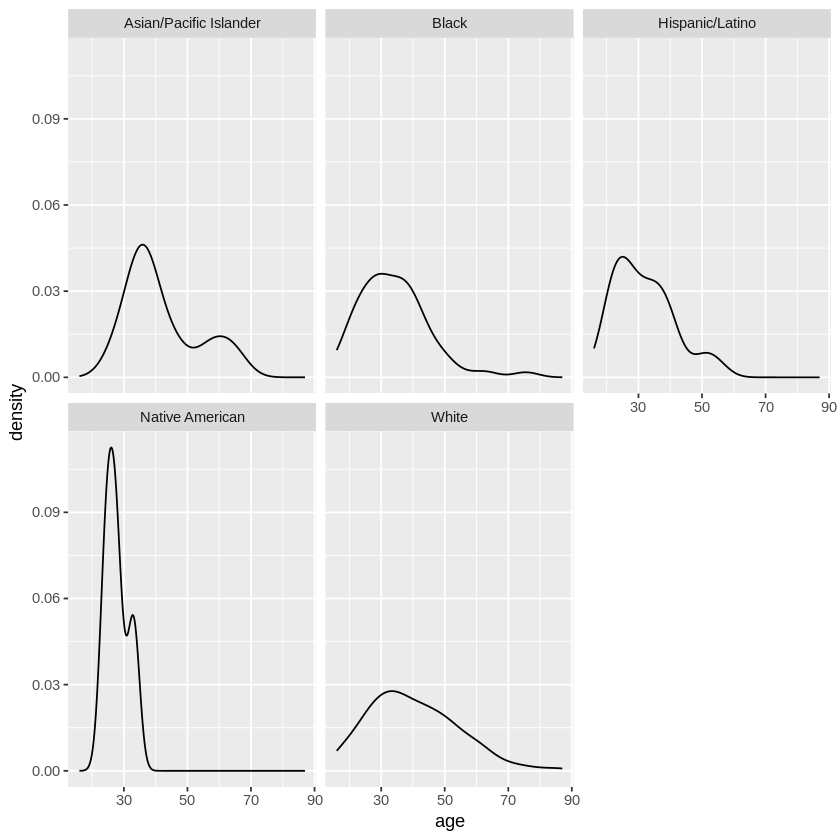

In [26]:
police_killings_clean %>%
  ggplot()+
  aes(x = age)+
  geom_density()+
  facet_wrap(~ raceethnicity)

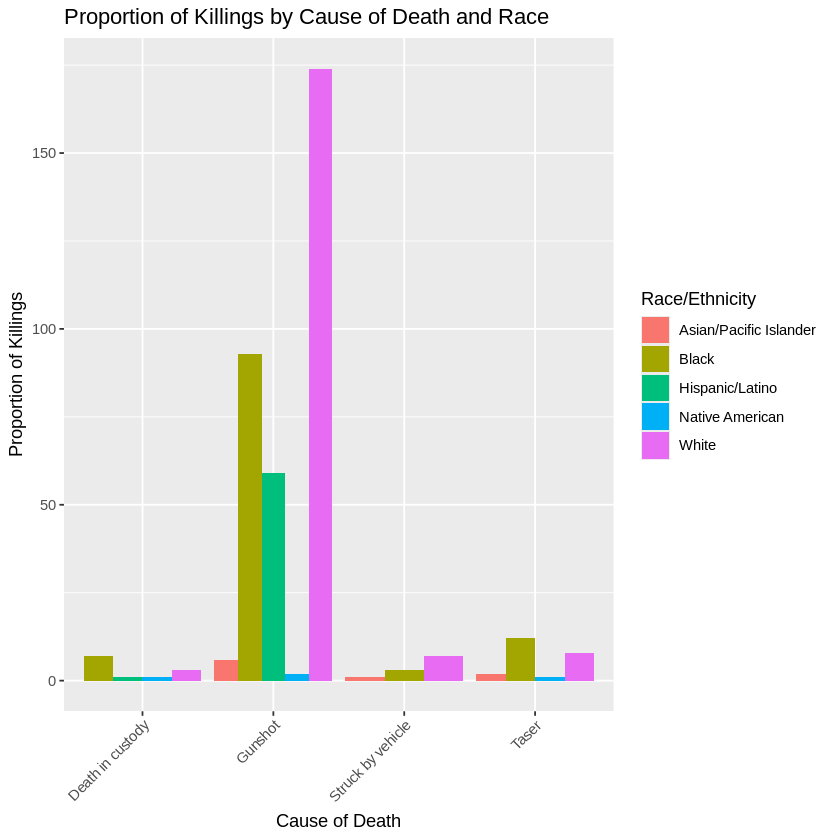

In [27]:
# prompt: cause of death on x axis stack by race per 100 incidents of each

# Assuming 'cause' is the column representing cause of death
ggplot(police_killings_clean, aes(x = cause, fill = raceethnicity)) +
  geom_bar(position = "dodge") +  # Use position = "fill" for proportions
  labs(title = "Proportion of Killings by Cause of Death and Race",
       x = "Cause of Death",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels if needed

       Population Hispanic    Black    White
1  Low Population 22.12563 20.20420 49.51891
2 High Population 25.10634 12.98662 52.77887


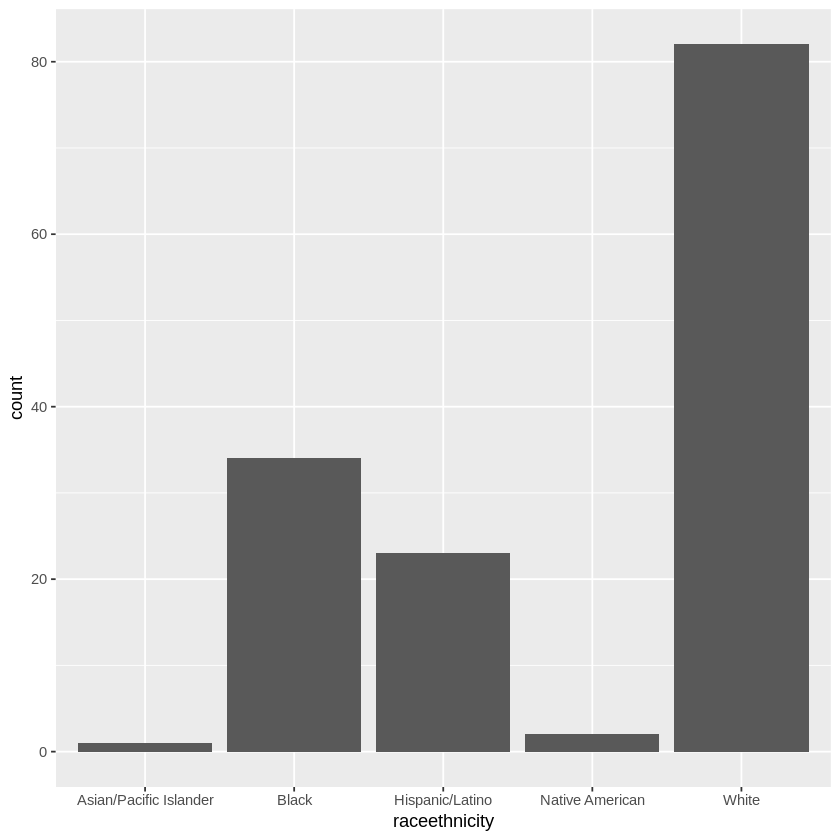

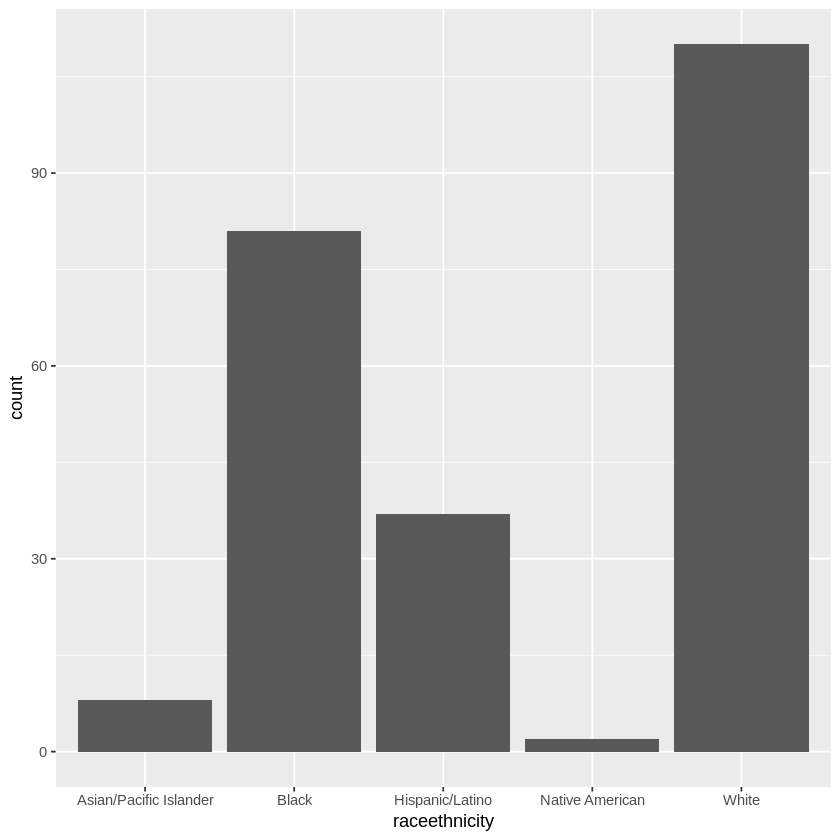

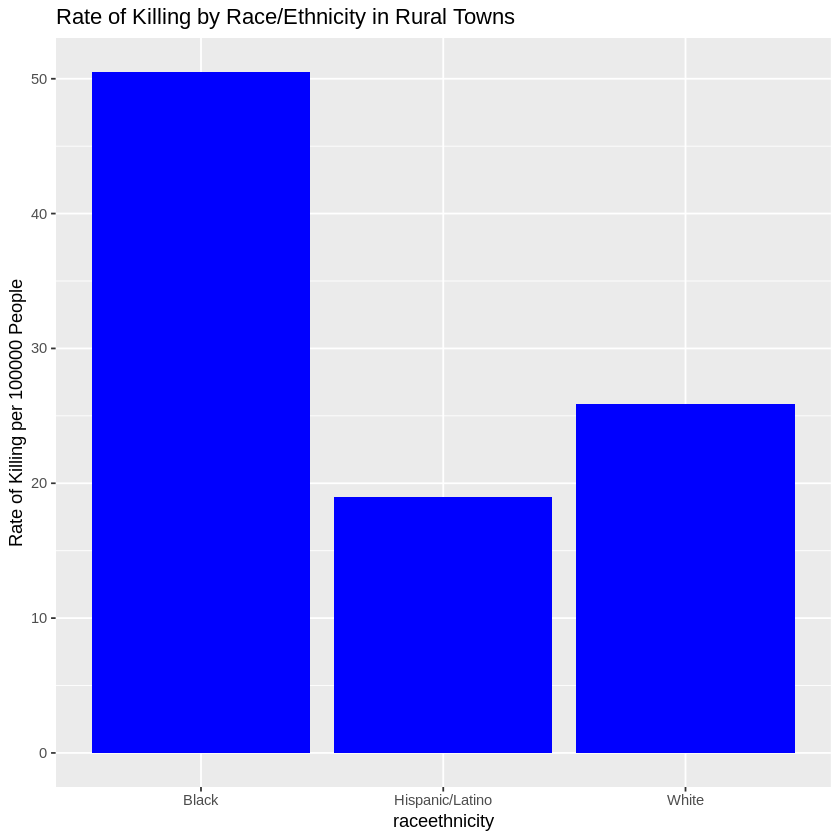

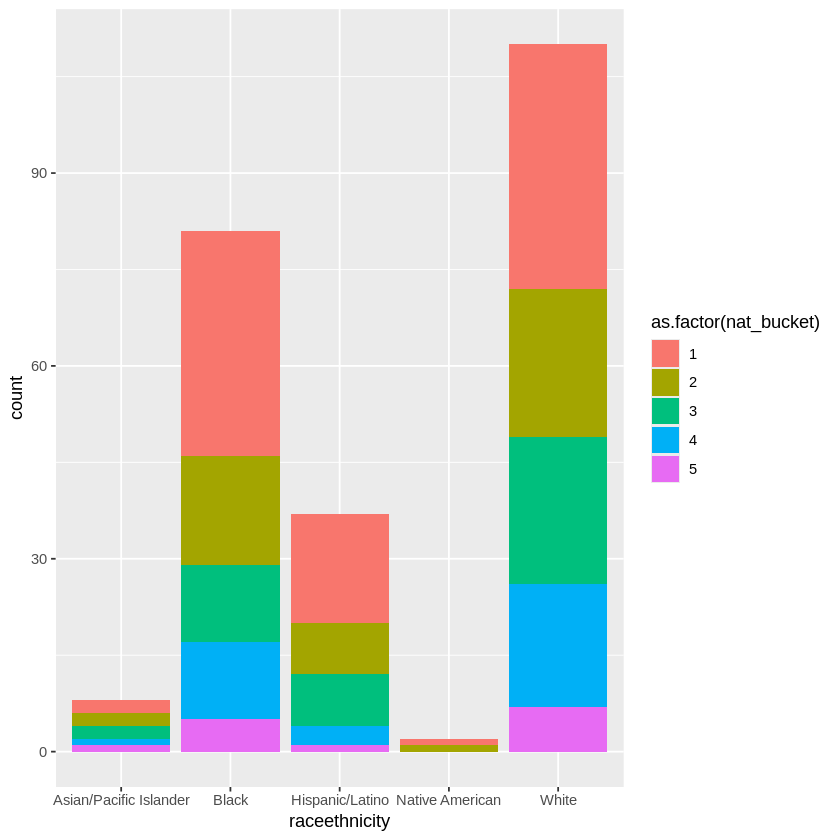

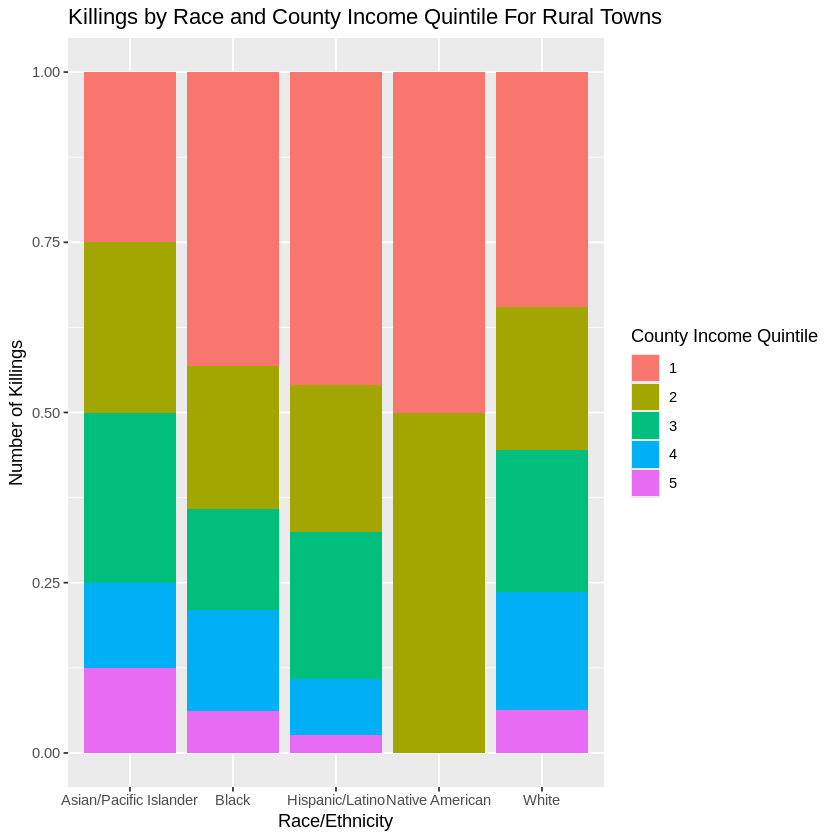

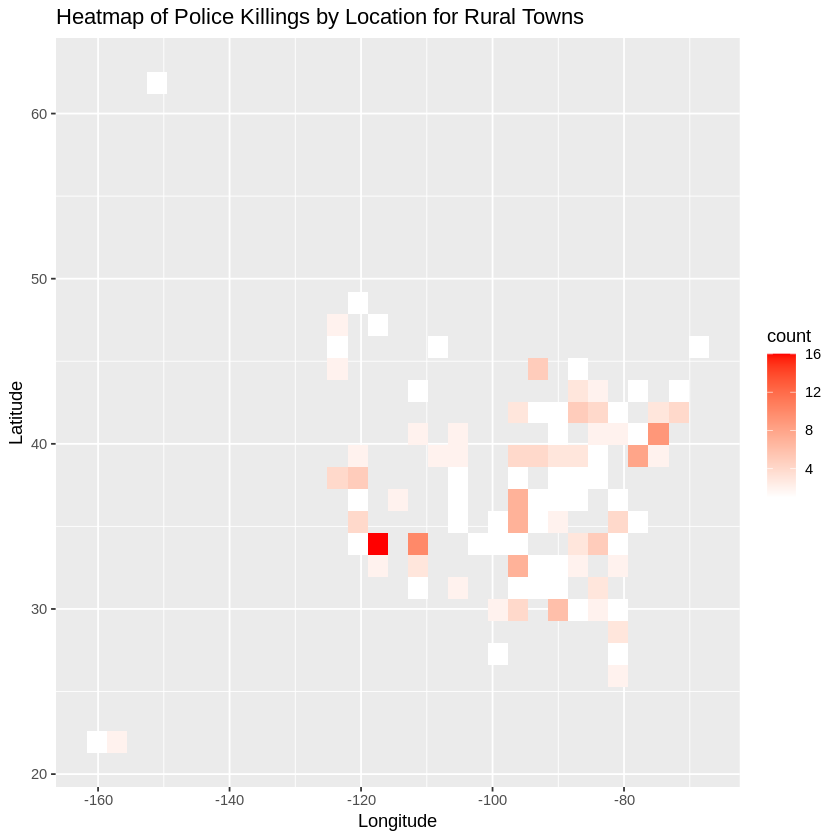

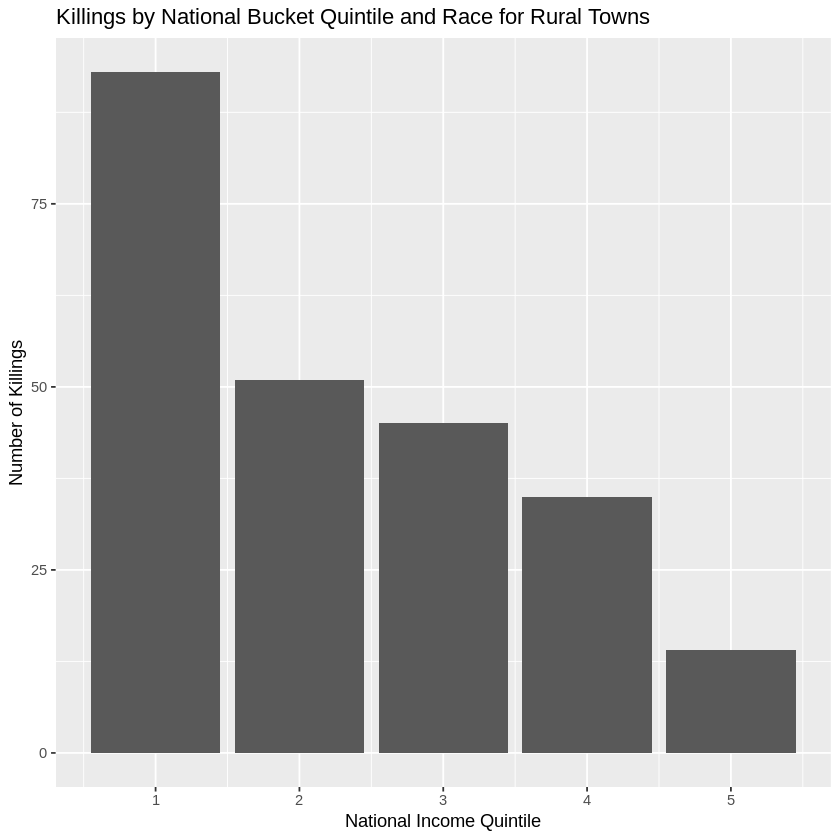

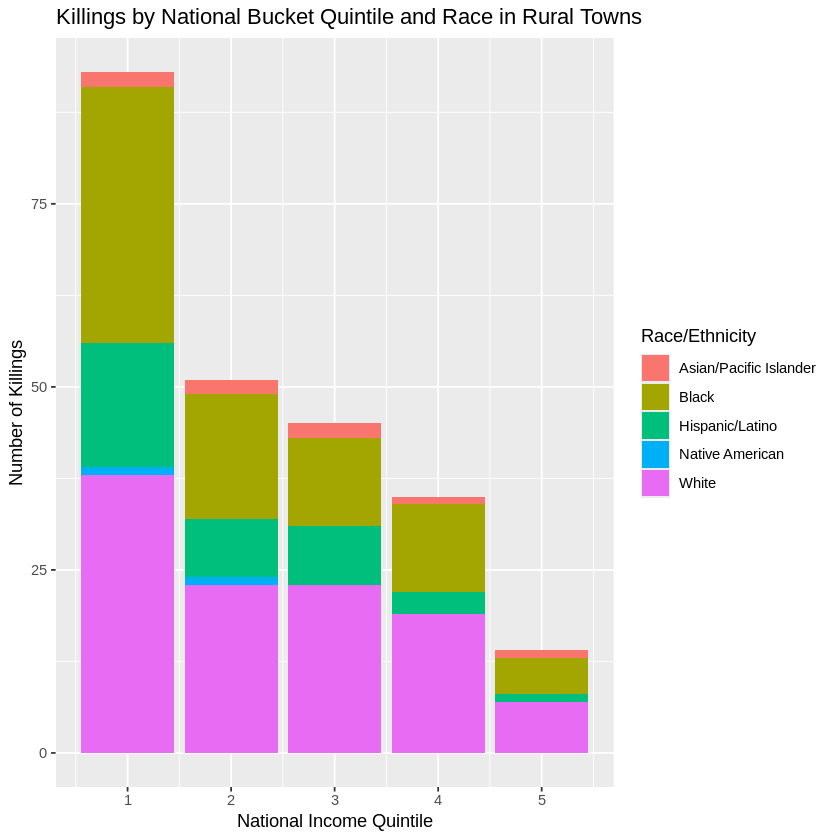

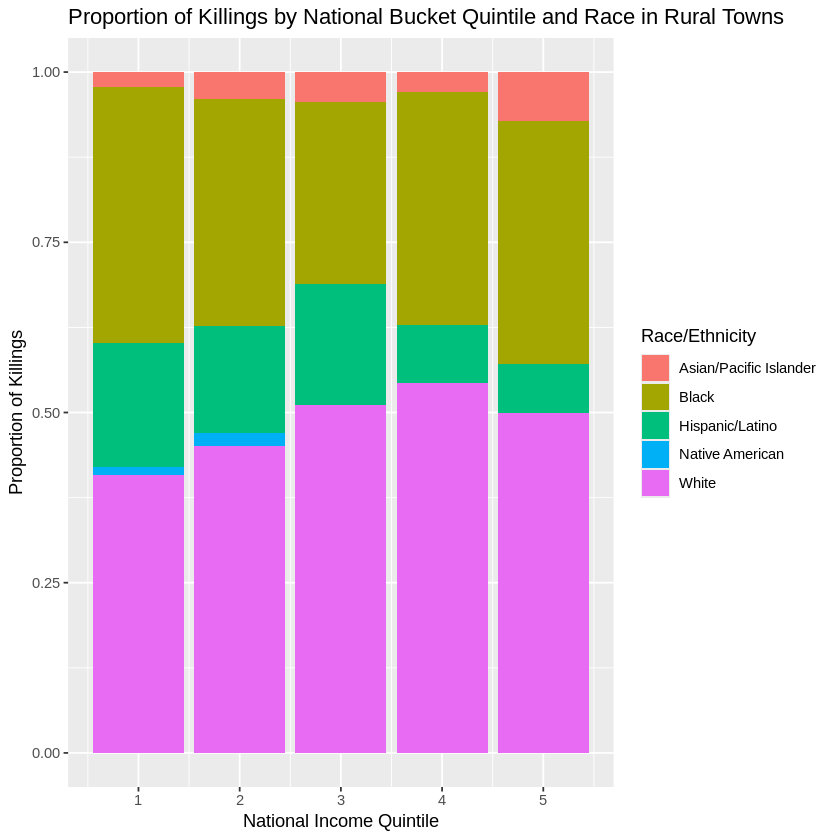

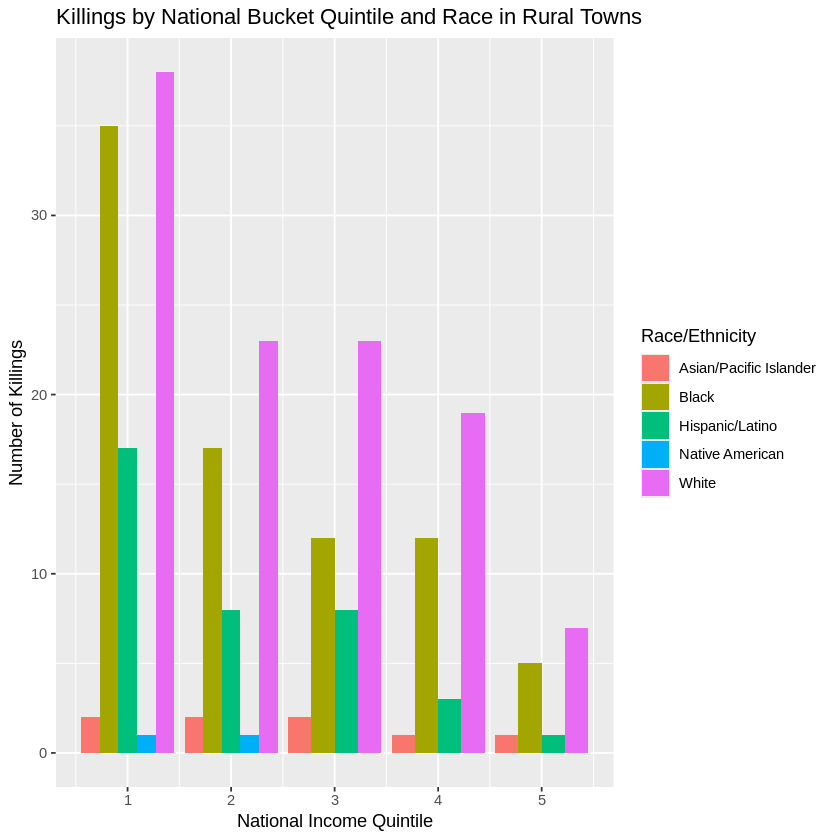

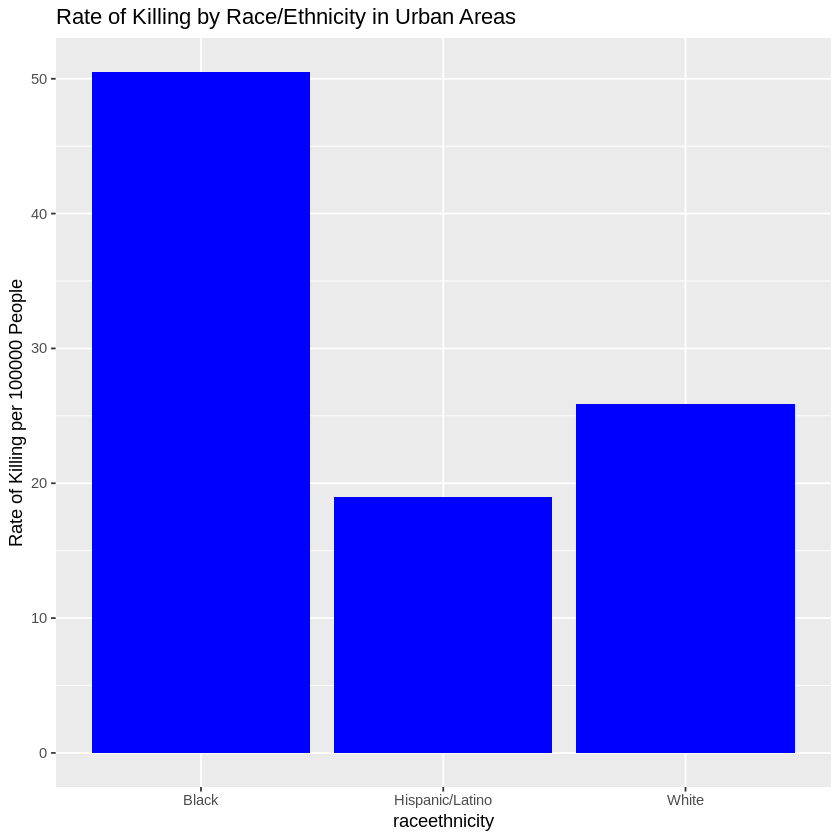

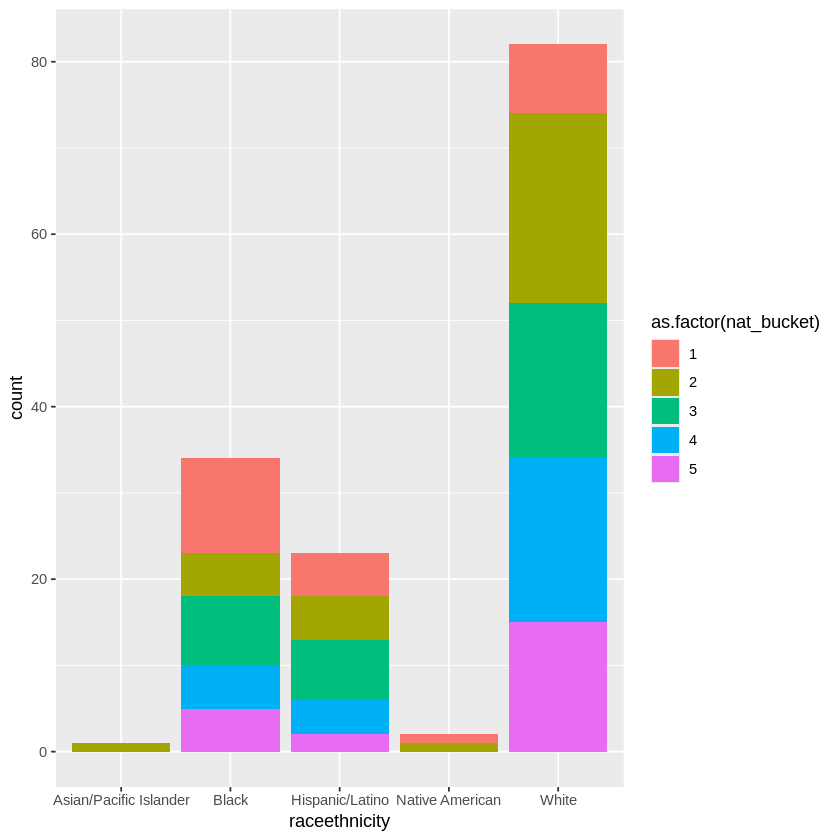

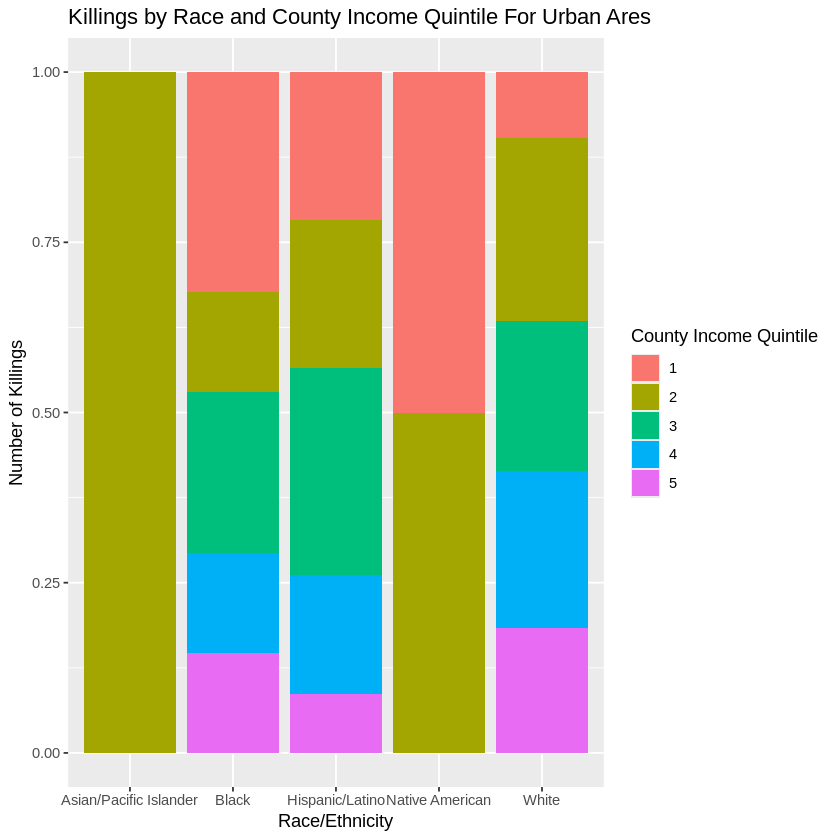

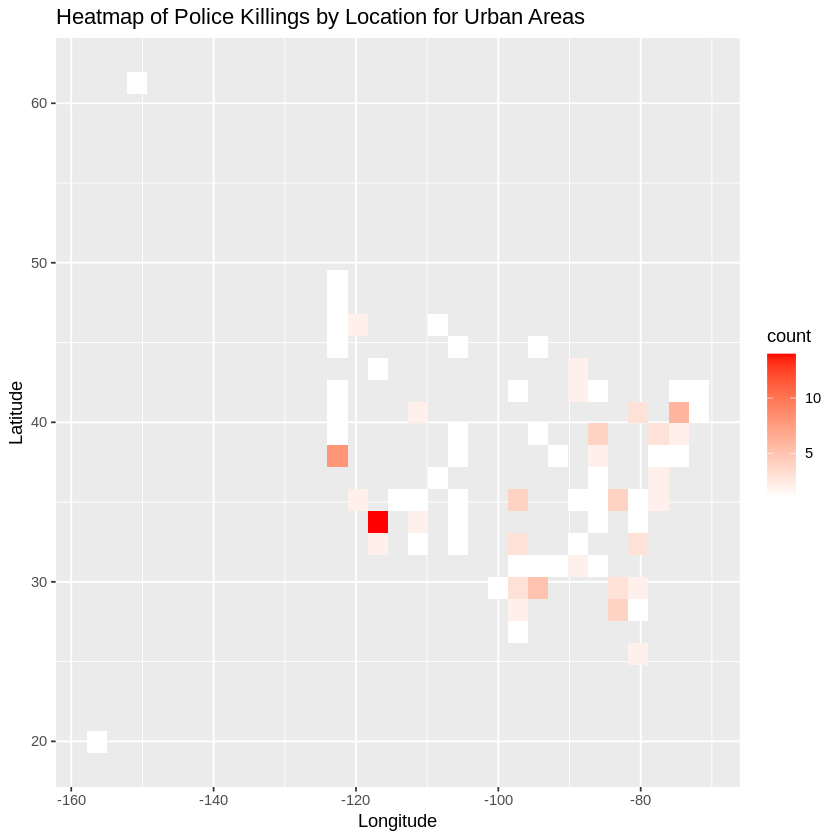

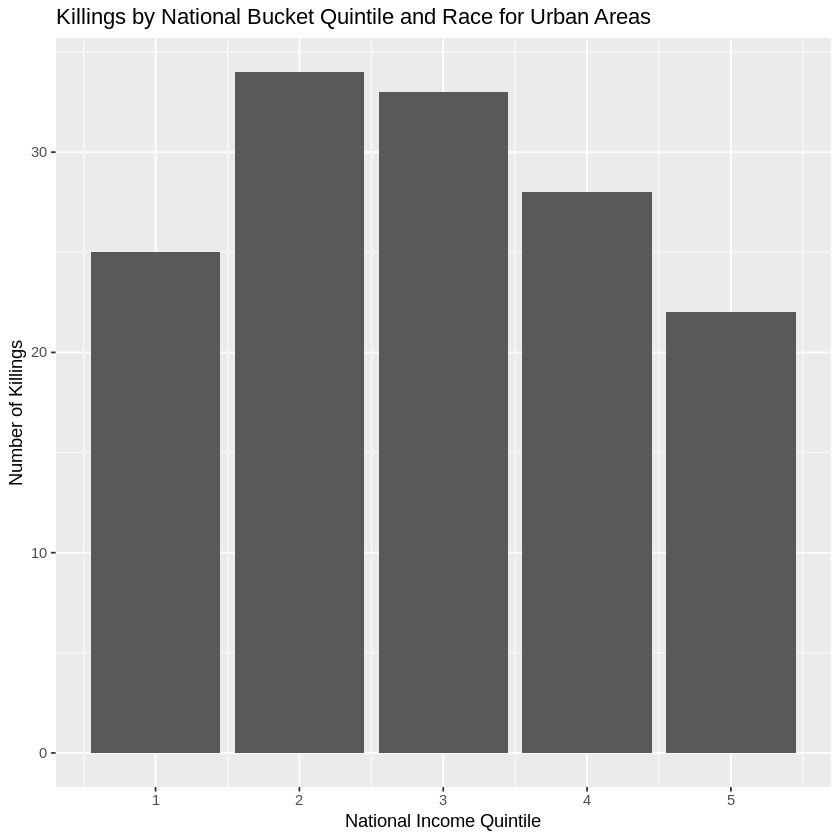

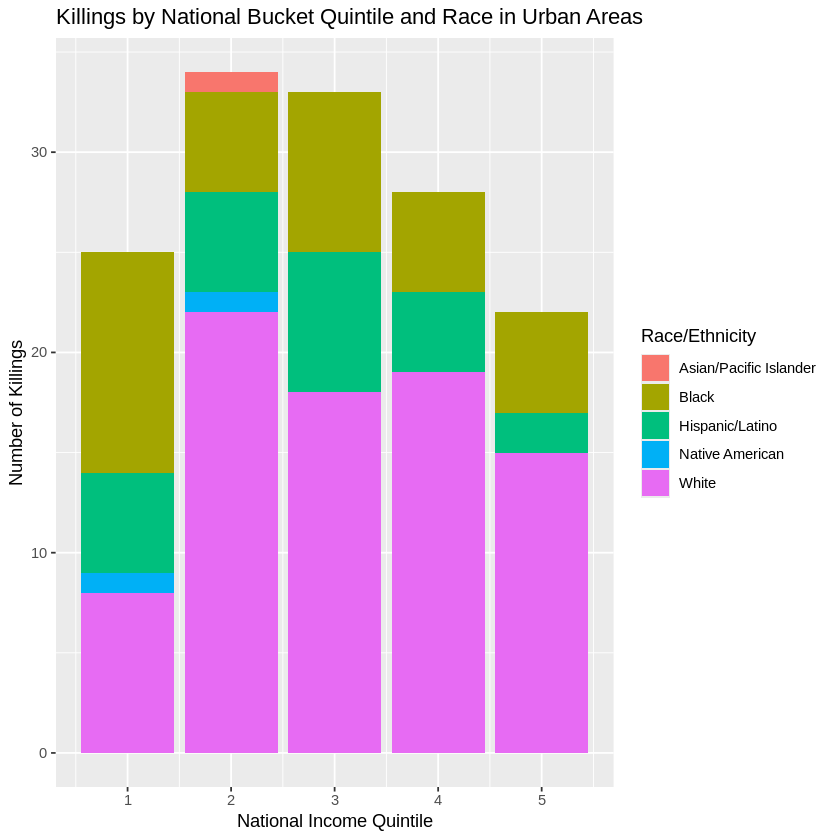

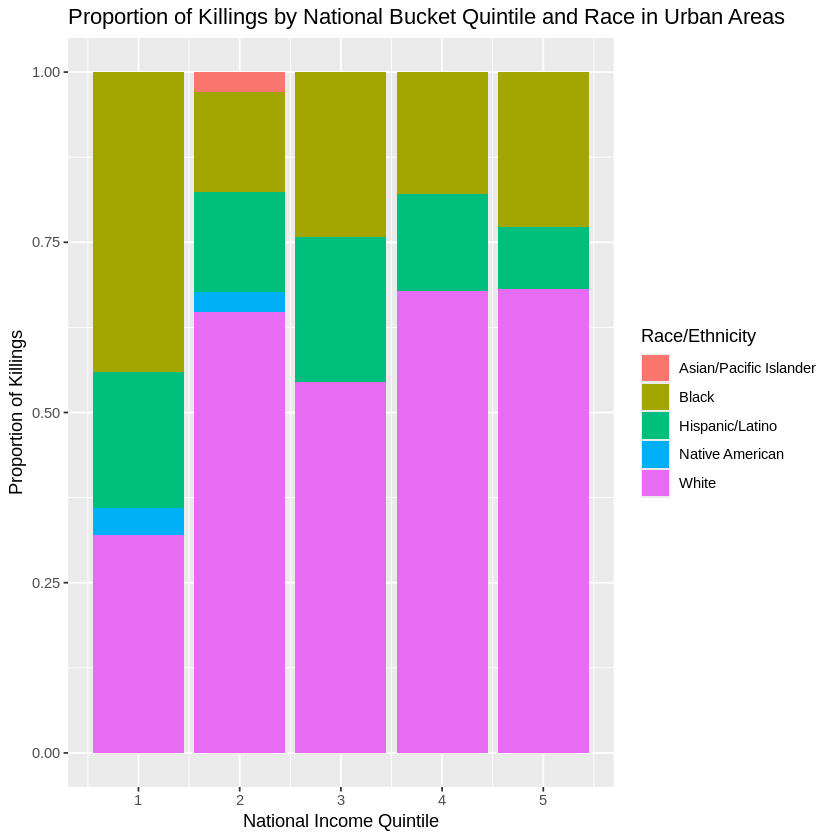

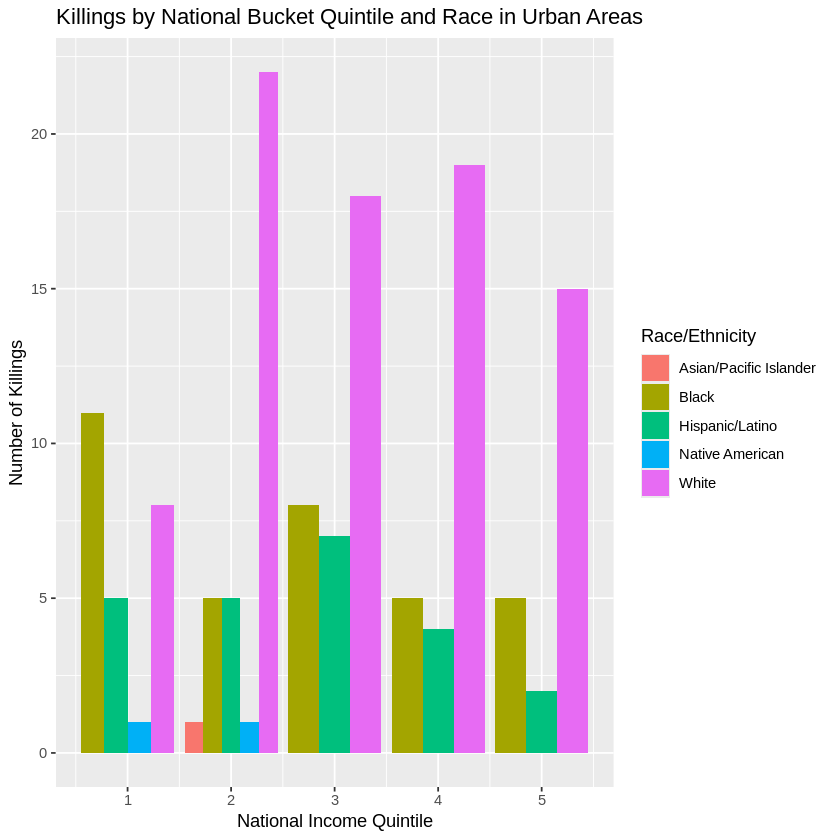

In [31]:
high_pop <- police_killings_clean %>%
  filter(police_killings_clean$pop > 5000)
low_pop <- police_killings_clean %>%
  filter(police_killings_clean$pop < 5000)

low_hispanic_mean <- mean(low_pop$share_hispanic)
high_hispanic_mean <- mean(high_pop$share_hispanic)
low_black_mean <- mean(low_pop$share_black)
high_black_mean <- mean(high_pop$share_black)
low_white_mean <- mean(low_pop$share_white)
high_white_mean <- mean(high_pop$share_white)

share_pop_data <- data.frame(
  Population = c("Low Population", "High Population"),
  Hispanic = c(low_hispanic_mean, high_hispanic_mean),
  Black = c(low_black_mean, high_black_mean),
  White = c(low_white_mean, high_white_mean)
)

# View the data frame
print(share_pop_data)

high_pop %>%
  ggplot()+
  aes(x= raceethnicity)+
  geom_bar()
low_pop %>%
  ggplot()+
  aes(x= raceethnicity)+
  geom_bar()
#_____________________

low_pop <- low_pop %>%
  mutate(
    pop = as.numeric(pop),
    share_white = as.numeric(share_white),
    share_black = as.numeric(share_black),
    share_hispanic = as.numeric(share_hispanic)
  )

# Create new columns 'whitepop', 'blackpop', and 'hispanicpop'
low_pop <- low_pop %>%
  mutate(
    whitepop = pop * share_white / 100,
    blackpop = pop * share_black / 100,
    hispanicpop = pop * share_hispanic / 100
  )
low_black_total_pop <- sum(low_pop$blackpop)
low_white_total_pop <- sum(low_pop$whitepop)
low_hispanic_total_pop <- sum(low_pop$hispanicpop)

low_race_count <- table(low_pop$raceethnicity)
low_w_rate100000<-low_race_count["White"]/low_white_total_pop*100000
low_b_rate100000<-low_race_count["Black"]/low_black_total_pop*100000
low_h_rate100000<-low_race_count["Hispanic/Latino"]/low_hispanic_total_pop*100000


low_rate_data <- data.frame(
  raceethnicity = c("White", "Black", "Hispanic/Latino"),
  rate = c(low_w_rate100000, low_b_rate100000, low_h_rate100000)
)

ggplot(low_rate_data, aes(x = raceethnicity, y = rate)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(y = "Rate of Killing per 100000 People",
       title = "Rate of Killing by Race/Ethnicity in Rural Towns")
low_pop %>%
  ggplot() +
  aes(x = raceethnicity, fill = as.factor(nat_bucket)) +
  geom_bar()

ggplot(low_pop, aes(x = raceethnicity, fill = as.factor(nat_bucket))) +
  geom_bar(position = "fill") +
  labs(title = "Killings by Race and County Income Quintile For Rural Towns",
       x = "Race/Ethnicity",
       y = "Number of Killings",
       fill = "County Income Quintile")


ggplot(low_pop, aes(x = longitude, y = latitude)) +
  geom_bin2d() +  # Use geom_bin2d for a heatmap
  labs(title = "Heatmap of Police Killings by Location for Rural Towns",
       x = "Longitude",
       y = "Latitude") +
  scale_fill_gradient(low = "white", high = "red") # Customize color scale

ggplot(low_pop, aes(x = nat_bucket)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race for Rural Towns",
       x = "National Income Quintile",
       y = "Number of Killings")

ggplot(low_pop, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race in Rural Towns",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

ggplot(low_pop, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Killings by National Bucket Quintile and Race in Rural Towns",
       x = "National Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

ggplot(low_pop, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "dodge") +
  labs(title = "Killings by National Bucket Quintile and Race in Rural Towns",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

#____________________________________________________
high_pop <- high_pop %>%
  mutate(
    pop = as.numeric(pop),
    share_white = as.numeric(share_white),
    share_black = as.numeric(share_black),
    share_hispanic = as.numeric(share_hispanic)
  )

# Create new columns 'whitepop', 'blackpop', and 'hispanicpop'
high_pop <- high_pop %>%
  mutate(
    whitepop = pop * share_white / 100,
    blackpop = pop * share_black / 100,
    hispanicpop = pop * share_hispanic / 100
  )
high_black_total_pop <- sum(high_pop$blackpop)
high_white_total_pop <- sum(high_pop$whitepop)
high_hispanic_total_pop <- sum(high_pop$hispanicpop)

high_race_count <- table(high_pop$raceethnicity)
high_w_rate100000<-high_race_count["White"]/high_white_total_pop*100000
high_b_rate100000<-high_race_count["Black"]/high_black_total_pop*100000
high_h_rate100000<-high_race_count["Hispanic/Latino"]/high_hispanic_total_pop*100000


high_rate_data <- data.frame(
  raceethnicity = c("White", "Black", "Hispanic/Latino"),
  rate = c(low_w_rate100000, low_b_rate100000, low_h_rate100000)
)

ggplot(high_rate_data, aes(x = raceethnicity, y = rate)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(y = "Rate of Killing per 100000 People",
       title = "Rate of Killing by Race/Ethnicity in Urban Areas")
high_pop %>%
  ggplot() +
  aes(x = raceethnicity, fill = as.factor(nat_bucket)) +
  geom_bar()

ggplot(high_pop, aes(x = raceethnicity, fill = as.factor(nat_bucket))) +
  geom_bar(position = "fill") +
  labs(title = "Killings by Race and County Income Quintile For Urban Ares",
       x = "Race/Ethnicity",
       y = "Number of Killings",
       fill = "County Income Quintile")


ggplot(high_pop, aes(x = longitude, y = latitude)) +
  geom_bin2d() +  # Use geom_bin2d for a heatmap
  labs(title = "Heatmap of Police Killings by Location for Urban Areas",
       x = "Longitude",
       y = "Latitude") +
  scale_fill_gradient(low = "white", high = "red") # Customize color scale

ggplot(high_pop, aes(x = nat_bucket)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race for Urban Areas",
       x = "National Income Quintile",
       y = "Number of Killings")

ggplot(high_pop, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race in Urban Areas",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

ggplot(high_pop, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Killings by National Bucket Quintile and Race in Urban Areas",
       x = "National Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

ggplot(high_pop, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "dodge") +
  labs(title = "Killings by National Bucket Quintile and Race in Urban Areas",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")


In [ ]:
# prompt: what question should i ask next

# Consider these questions:

# 1.  Data Exploration and Cleaning:
#  * How many missing values are there in each column?
#  * What are the unique values for the 'raceethnicity' and 'manner_of_death' columns?
#  * Are there any outliers or inconsistencies in the data that need addressing?
#  * What is the distribution of ages in the dataset?

# 2. Visualization Enhancements:
# * Can we improve the readability of the bar chart (e.g. add labels, change colors)?
#  * How does the distribution of raceethnicity vary across different states or cities?
#  * Create a visualization showing the relationship between age and manner of death.
#  * Is there a correlation between the victim's mental illness status and the outcome?

# 3.  Statistical Analysis:
# * What is the proportion of killings for each raceethnicity group?
# * Are there significant differences in killing rates among different racial groups?
# * Is there a correlation between the manner of death and the victim's raceethnicity?

# 4. Addressing Ethical Considerations:
# * How might biases in data collection impact the results?
# * What are some limitations of the data, and how might they affect our conclusions?
# * What are some potential next steps in analyzing the data, and what additional data sources could be helpful?

# Example of a more specific question based on the provided code:
# "How can I order the bars in the bar chart of raceethnicity by frequency to improve readability?"
